# Análise sobre os Acidentes nas Rodovias Federais do Brasil no Ano de 2019. 

# 1 Perguntas Para Análise

* Quais as rodovias mais perigosas?

* Qual o estado que mais possuem acidentes?

* Tipo de pessoa que mais de envolve em acidentes.

* Porcentagem de estados físicos após acidentes.

* Causa dos acidentes mais frequentes.

* Tipo de pista que mais causam acidentes.

* Sexo com maior número de mortes.

* Analisando a tipo de acidentes com sexo.

* Dias em que mais ocorrem acidentes.

* Turno que mais ocorrem os acidentes.

* Mapa mostrando a localidade.

* Mapa interativo dos acidentes  de 2019. 




In [47]:
#importando bibliotecas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from folium.plugins import MarkerCluster
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap
from folium import plugins
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Habilita modo offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Definindo o renderizador:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"
%matplotlib inline

In [109]:
#constantes
DATA_RAW_NAME='acidentes2019.csv'
DATA_RAW_PATH = os.path.abspath(os.path.join('..','data','raw',DATA_RAW_NAME))
IMG_PATH = os.path.abspath(os.path.join('..','img'))

In [110]:
#importando os dados
df = pd.read_csv(DATA_RAW_PATH, sep =';', encoding ='latin1')

In [111]:
#mostrar todo o dataset
pd.set_option('display.max_columns', None)

df.head()

id     pesid data_inversa   dia_semana   horario  uf     br     km  \
0  182256.0  403856.0   2019-01-01  terça-feira  04:00:00  CE  116.0  136,9   
1  182263.0  402859.0   2019-01-01  terça-feira  05:00:00  MT  158.0  599,5   
2  182277.0  402850.0   2019-01-01  terça-feira  10:00:00  PA   10.0     34   
3  182289.0  402431.0   2019-01-01  terça-feira  08:30:00  BA  101.0     13   
4  182307.0  402642.0   2019-01-01  terça-feira  13:50:00  BA  116.0    440   

          municipio               causa_acidente              tipo_acidente  \
0            RUSSAS             Animais na Pista    Atropelamento de Animal   
1          AGUA BOA  Defeito Mecânico no Veículo                   Incêndio   
2        DOM ELISEU      Velocidade Incompatível           Colisão traseira   
3          RIO REAL           Ingestão de Álcool           Colisão traseira   
4  FEIRA DE SANTANA           Ingestão de Álcool  Saída de leito carroçável   

  classificacao_acidente   fase_dia  sentido_via condicao_metereologica  \
0            Sem Vítimas  Amanhecer  Decrescente                  Vento   
1            Sem Vítimas  Amanhecer  Decrescente         Garoa/Chuvisco   
2            Sem Vítimas  Pleno dia  Decrescente                Nublado   
3    Com Vítimas Feridas  Pleno dia  Decrescente              Céu Claro   
4    Com Vítimas Feridas  Pleno dia  Decrescente              Céu Claro   

  tipo_pista        tracado_via uso_solo  id_veiculo     tipo_veiculo  \
0    Simples              Curva      Não      324937         Caminhão   
1    Simples               Reta      Não      324940         Caminhão   
2    Simples      Não Informado      Não      324958  Caminhão-trator   
3      Dupla  Desvio Temporário      Não      324987  Caminhão-trator   
4      Dupla              Curva      Não      325030  Caminhão-trator   

                      marca  ano_fabricacao_veiculo tipo_envolvido  \
0  I/MB 15SPRINT RONTAN AMB                  2012.0       Condutor   
1          FORD/CARGO 815 N                  2011.0       Condutor   
2         VOLVO/FH 540 6X4T                  2012.0       Condutor   
3         SCANIA/R 440 A6X2                  2018.0       Condutor   
4       VOLVO/FH12 380 4X2T                  2003.0     Passageiro   

   estado_fisico  idade       sexo  ilesos  feridos_leves  feridos_graves  \
0          Ileso   35.0  Masculino       1              0               0   
1          Ileso   30.0  Masculino       1              0               0   
2          Ileso   54.0  Masculino       1              0               0   
3          Ileso   43.0  Masculino       1              0               0   
4  Lesões Graves   37.0  Masculino       0              0               1   

   mortos     latitude     longitude regional delegacia       uop  
0       0    -4,766018    -38,056034    SR-CE   DEL16/3  UOP01/CE  
1       0      -14,319       -52,169    SR-MT    DEL2/8  UOP02/MT  
2       0  -4,15296734  -47,54608154    SR-PA   DEL19/2  UOP03/PA  
3       0     -11,5896      -37,8761    SR-SE   DEL20/2  UOP03/SE  
4       0      -12,344       -39,087    SR-BA   DEL10/2  UOP01/BA

## 2 Limpeza dos dados

In [93]:
#Consultando o tipo dos dados. 
df.dtypes

id                        float64
pesid                     float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
id_veiculo                  int64
tipo_veiculo               object
marca                      object
ano_fabricacao_veiculo    float64
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves               int64
feridos_graves              int64
mortos        

In [94]:
df.describe()

id          pesid             br     id_veiculo  \
count  162273.000000  162272.000000  162042.000000  162273.000000   
mean   221717.416865  492648.269313     217.467971  395616.163009   
std     22637.125797   51063.880978     132.050917   40807.363805   
min    182210.000000  402087.000000      10.000000  324863.000000   
25%    202070.000000  448657.750000     101.000000  360260.000000   
50%    221655.000000  493085.500000     163.000000  395854.000000   
75%    241471.000000  536997.250000     354.000000  431382.000000   
max    266627.000000  594393.000000     495.000000  475775.000000   

       ano_fabricacao_veiculo          idade         ilesos  feridos_leves  \
count           152353.000000  146514.000000  162273.000000  162273.000000   
mean              2009.417799      39.879711       0.422954       0.372829   
std                  7.536433      51.426590       0.494030       0.483559   
min               1900.000000       0.000000       0.000000       0.000000   
25%               2007.000000      27.000000       0.000000       0.000000   
50%               2011.000000      37.000000       0.000000       0.000000   
75%               2014.000000      48.000000       1.000000       1.000000   
max               2019.000000    2018.000000       1.000000       1.000000   

       feridos_graves         mortos  
count   162273.000000  162273.000000  
mean         0.114455       0.032864  
std          0.318364       0.178282  
min          0.000000       0.000000  
25%          0.000000       0.000000  
50%          0.000000       0.000000  
75%          0.000000       0.000000  
max          1.000000       1.000000

In [95]:
#Removendo duplicatas se houver
df.drop_duplicates(keep=False, inplace=True)

In [96]:
#Verificando dados faltosos
df.isnull().sum().sort_values(ascending=False)

idade                     15759
ano_fabricacao_veiculo     9920
uop                        8519
marca                      8151
br                          231
km                          231
pesid                         1
tipo_acidente                 0
sentido_via                   0
fase_dia                      0
classificacao_acidente        0
municipio                     0
causa_acidente                0
tipo_pista                    0
uf                            0
horario                       0
dia_semana                    0
data_inversa                  0
condicao_metereologica        0
uso_solo                      0
tracado_via                   0
delegacia                     0
id_veiculo                    0
tipo_veiculo                  0
tipo_envolvido                0
estado_fisico                 0
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude

In [97]:
#Dropando colunas com muitos dados faltosos e outras que não serão cosideradas para essa análise.
#Criar uma função que identifica as colunas com mais dads faltosos e elimina de acordo com o % escolhida.
def remocao(lista_features):
    for i in lista_features:
        df.drop(i,axis=1,inplace=True)
remocao(['id','pesid','marca','ano_fabricacao_veiculo','uop','delegacia','regional','id_veiculo'])
df.head()


data_inversa   dia_semana   horario  uf     br     km         municipio  \
0   2019-01-01  terça-feira  04:00:00  CE  116.0  136,9            RUSSAS   
1   2019-01-01  terça-feira  05:00:00  MT  158.0  599,5          AGUA BOA   
2   2019-01-01  terça-feira  10:00:00  PA   10.0     34        DOM ELISEU   
3   2019-01-01  terça-feira  08:30:00  BA  101.0     13          RIO REAL   
4   2019-01-01  terça-feira  13:50:00  BA  116.0    440  FEIRA DE SANTANA   

                causa_acidente              tipo_acidente  \
0             Animais na Pista    Atropelamento de Animal   
1  Defeito Mecânico no Veículo                   Incêndio   
2      Velocidade Incompatível           Colisão traseira   
3           Ingestão de Álcool           Colisão traseira   
4           Ingestão de Álcool  Saída de leito carroçável   

  classificacao_acidente   fase_dia  sentido_via condicao_metereologica  \
0            Sem Vítimas  Amanhecer  Decrescente                  Vento   
1            Sem Vítimas  Amanhecer  Decrescente         Garoa/Chuvisco   
2            Sem Vítimas  Pleno dia  Decrescente                Nublado   
3    Com Vítimas Feridas  Pleno dia  Decrescente              Céu Claro   
4    Com Vítimas Feridas  Pleno dia  Decrescente              Céu Claro   

  tipo_pista        tracado_via uso_solo     tipo_veiculo tipo_envolvido  \
0    Simples              Curva      Não         Caminhão       Condutor   
1    Simples               Reta      Não         Caminhão       Condutor   
2    Simples      Não Informado      Não  Caminhão-trator       Condutor   
3      Dupla  Desvio Temporário      Não  Caminhão-trator       Condutor   
4      Dupla              Curva      Não  Caminhão-trator     Passageiro   

   estado_fisico  idade       sexo  ilesos  feridos_leves  feridos_graves  \
0          Ileso   35.0  Masculino       1              0               0   
1          Ileso   30.0  Masculino       1              0               0   
2          Ileso   54.0  Masculino       1              0               0   
3          Ileso   43.0  Masculino       1              0               0   
4  Lesões Graves   37.0  Masculino       0              0               1   

   mortos     latitude     longitude  
0       0    -4,766018    -38,056034  
1       0      -14,319       -52,169  
2       0  -4,15296734  -47,54608154  
3       0     -11,5896      -37,8761  
4       0      -12,344       -39,087

/home/bruno/Modelos/DataScience/grazielly/estudos/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



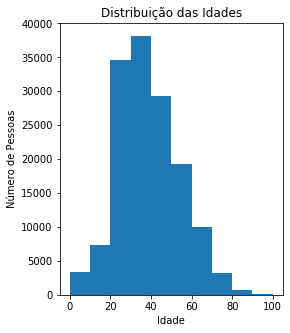

In [31]:
#Tratando dados faltosos de idade.

#observando a distribuição

plt.figure(figsize=(4, 5))
plt.hist(df.idade, bins=range(0, 110,10), normed=False)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.savefig(os.path.join(IMG_PATH,'distribuição_idade.png'), format='png')
plt.show()

In [32]:
# Preenchendo os valores nulos da coluna 'idade' com a média. 
df['idade'].fillna(df['idade'].mean(), inplace=True)
df['idade'] = df['idade'].astype('int')

In [33]:
# Agrupando as idades em categorias, segundo dados do ibge. 
# 0-13 anos (Crianca), 14-18 anos (Jovem), 18-59 anos (Adulto), 60-78 anos (Idoso)
df['idade'] = pd.cut(df['idade'],[0,13,20,60,78], labels=['Crianca','Jovem','Adulto','Idoso'])

In [34]:
#Tratando dados faltoses de br

df['br'].fillna(0, inplace=True)

In [35]:
#Tratando Latitude e Longitude ',' para '.'/ srt'para float'
df.loc[:,['latitude','longitude']] = df.loc[:,['latitude','longitude']].apply(lambda x: x.str.replace('.', '').str.replace(',', '.').astype("float"), axis = 1)

In [36]:
#tratando tipo de veiculos
df.tipo_veiculo.unique()

array(['Caminhão', 'Caminhão-trator', 'Reboque', 'Semireboque',
       'Automóvel', 'Motoneta', 'Bicicleta', 'Caminhonete', 'Camioneta',
       'Motocicleta', 'Utilitário', 'Micro-ônibus', 'Ônibus',
       'Ciclomotor', 'Outros', 'Carro de mão', 'Trator de rodas',
       'Trem-bonde', 'Triciclo', 'Carroça-charrete', 'Não Informado',
       'Quadriciclo', 'Trator misto', 'Trator de esteira'], dtype=object)

In [37]:
df.tipo_veiculo.replace(['Caminhão-trator','Camioneta','Motoneta','Trem-bonde'],['Caminhão','Caminhonete','Motocicleta','Trem'], inplace=True)
df.tipo_veiculo.replace(['Trator de rodas','Trator misto','Trator de esteira'],'Trator', inplace=True)
df.tipo_veiculo.replace(['Ciclomotor','Triciclo','Quadriciclo'],'Bicicleta_motorizada', inplace=True)

In [38]:
df.shape

(162273, 27)

# 3 EDA

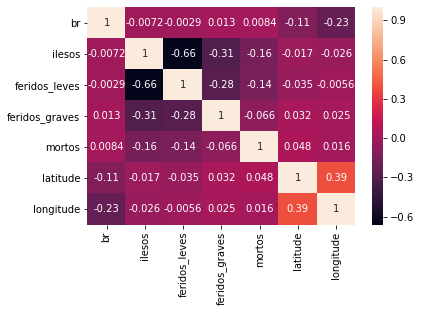

In [41]:
#plot de correlação dos dados
fig = sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
plt.show()
fig.savefig(os.path.join(IMG_PATH,'correlação_geral.png'), format='png')

In [144]:
#Observando a porcentagem de envolvidos nos acidentes
todos_envolvidos = int(68634+5333+60500+18573)
df1 = round(df[['ilesos','mortos','feridos_leves','feridos_graves']].sum()/todos_envolvidos * 100, 1)
df1

ilesos            44.8
mortos             3.5
feridos_leves     39.5
feridos_graves    12.1
dtype: float64

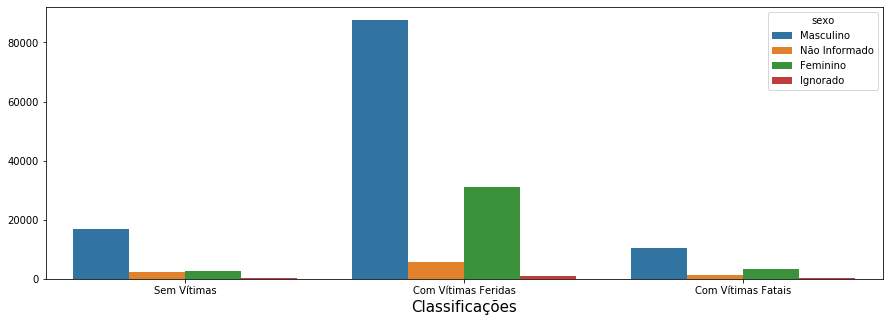

In [100]:
#Analisando a classificacao_acidentes com sexo. 
plt.figure(figsize=(15,5))
fig = sns.countplot(x='classificacao_acidente',data=df,hue='sexo')
plt.xlabel('Classificações',size=15)
plt.ylabel('')
plt.savefig(os.path.join(IMG_PATH,'classificacao_acidentes.png'), format='png')
plt.show()


Maior número de vítimas está entres os homens.

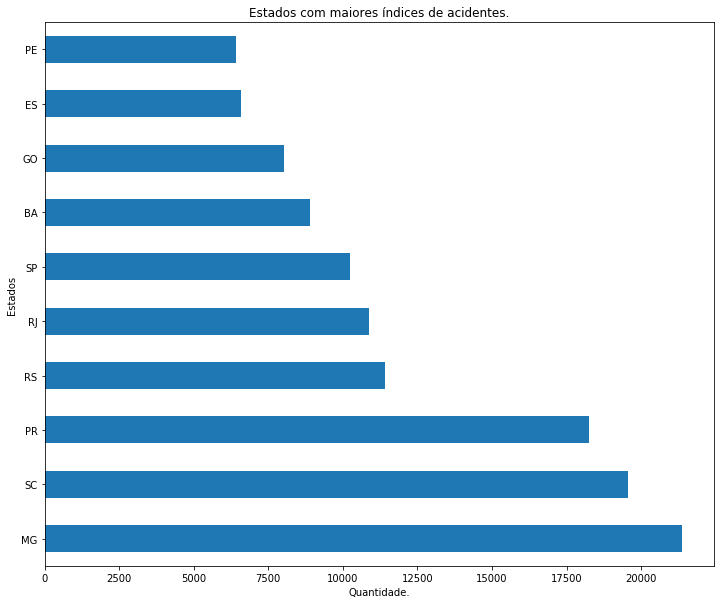

In [132]:
#Estados onde há mais acidentes
fig = plt.figure(figsize=(12,10))
fig = df['uf'].value_counts().head(10).plot.barh()
fig.set_title("Estados com maiores índices de acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('Estados')
plt.savefig(os.path.join(IMG_PATH,'estados_maiores_acidentes.png'), format='png')
plt.show()

O estado brasileiro que mais possui acidentes é Minas Gerais, seguido de Santa Catarina e Paraná. 

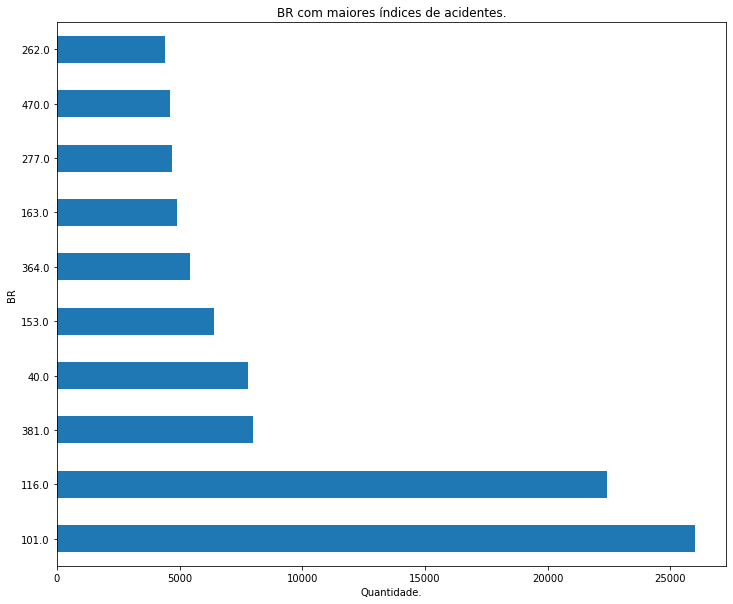

In [51]:
#Br com maiores índices de acidentes.
fig = plt.figure(figsize=(12,10))
fig = df['br'].value_counts().head(10).plot.barh()
fig.set_title("BR com maiores índices de acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('BR')
plt.savefig(os.path.join(IMG_PATH,'BR_maiores_acidentes.png'), format='png')
plt.show()

A Br em que há mais acidentes é a Br 101,116,381, respectivamente. 

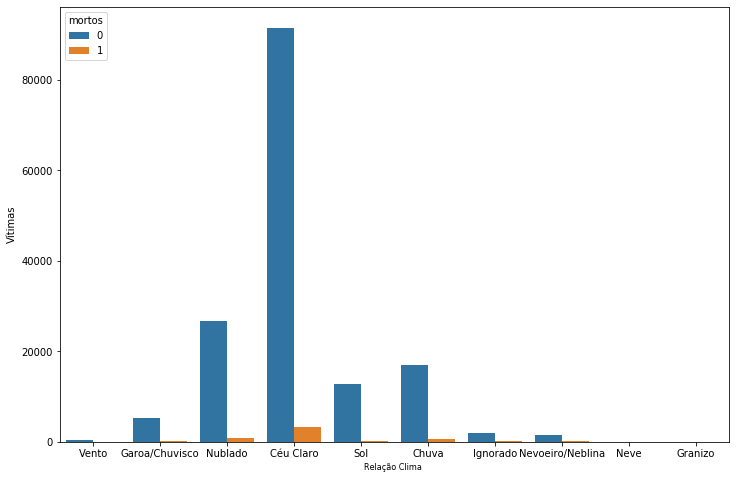

In [52]:
#Verificando se há relação entre o clima com o aumento dos acidentes
plt.figure(figsize=(12,8))
sns.countplot(x='condicao_metereologica',data=df,hue='mortos')
plt.xlabel('Relação Clima ',size=8)
plt.ylabel('Vítimas')
plt.savefig(os.path.join(IMG_PATH,'classificacao_acidentes_e_clima.png'), format='png')
plt.show()

A maioria dos acidentes ocorrem em céu claro.

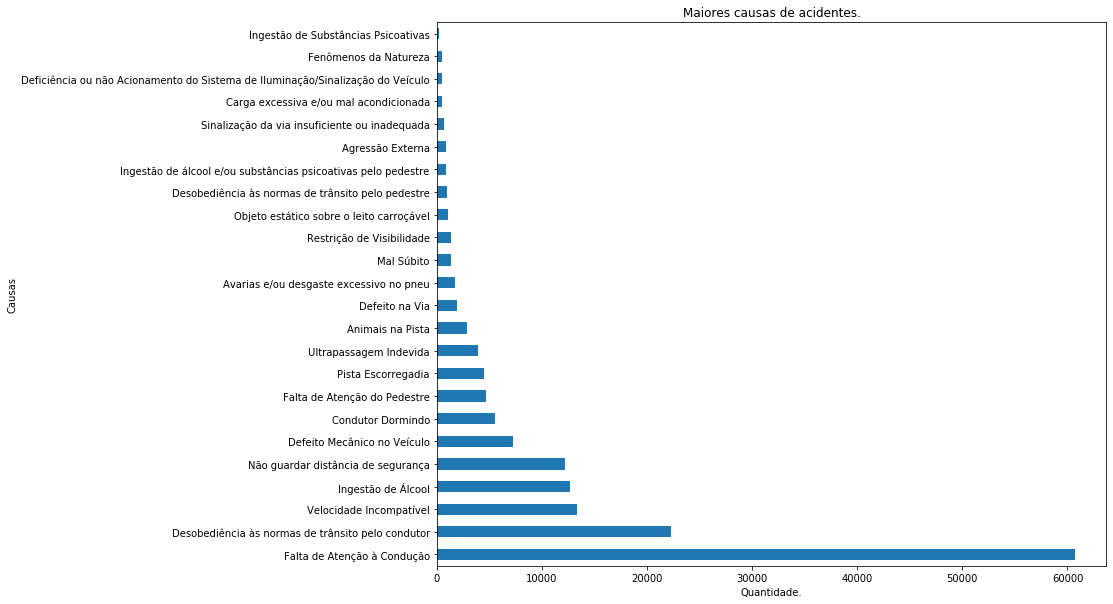

In [53]:
# Verificando a maior causa dos acidentes. 
fig = plt.figure(figsize=(12,10))
fig = df['causa_acidente'].value_counts().plot.barh()
fig.set_title("Maiores causas de acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('Causas')
plt.savefig(os.path.join(IMG_PATH,'causa_de_acidentes.png'), format='png')
plt.show()

O top 5 das maiores causas de acidentes no ano de 2019 foi devido a falta de atenção à condução, seguido de desobediência as normas de trânsito pelo condutor, velocidade incompatível, ingestão de álcool e não aderir a distância miníma de segurança. 

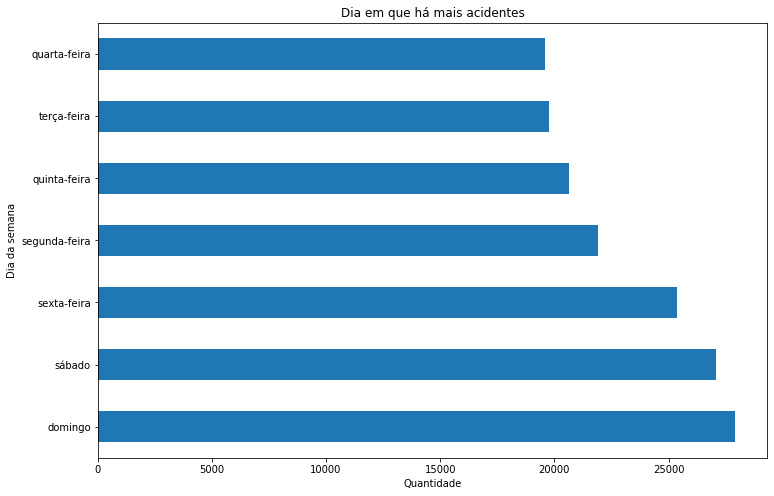

In [54]:
#Verificando o dia da semana que ocorrem mais acidentes.
fig = plt.figure(figsize=(12,8))
fig = df['dia_semana'].value_counts().plot.barh()
fig.set_title("Dia em que há mais acidentes")
fig.set_xlabel('Quantidade')
fig.set_ylabel('Dia da semana')
plt.savefig(os.path.join(IMG_PATH,'dia_que_correm_mais_acidente.png'), format='png')
plt.show()

Os acidentes ocorrem mais nos fins de semana. 

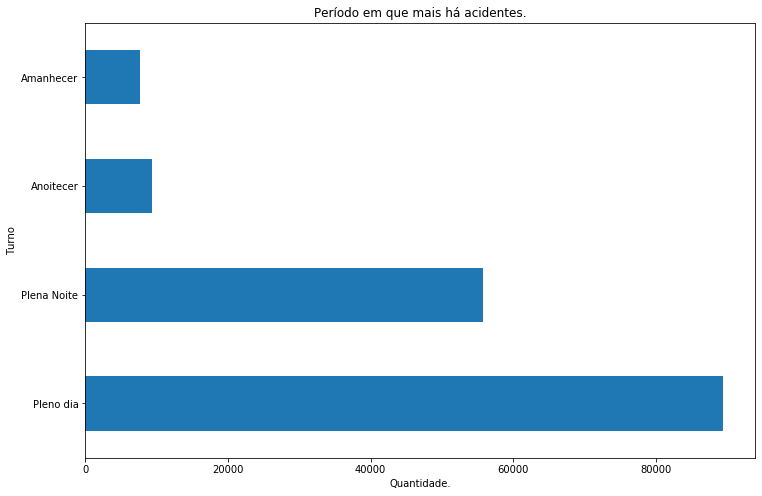

In [148]:
# Verificando o turno em que há mais acidentes. 
fig = plt.figure(figsize=(12,8))
fig = df['fase_dia'].value_counts().plot.barh()
fig.set_title("Período em que mais há acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('Turno')
plt.savefig(os.path.join(IMG_PATH,'turno_mais_acidentes.png'), format='png')
plt.show()

Grande parte dos acidentes ocorre durante o dia. 

In [57]:
#Relação entre o tipo de acidentes com número de mortos. 
tipo_de_acidente= df.groupby('tipo_acidente')[['mortos']].count().sort_values(by='mortos',ascending= False).head(20)
tipo_de_acidente.reset_index(inplace=True)

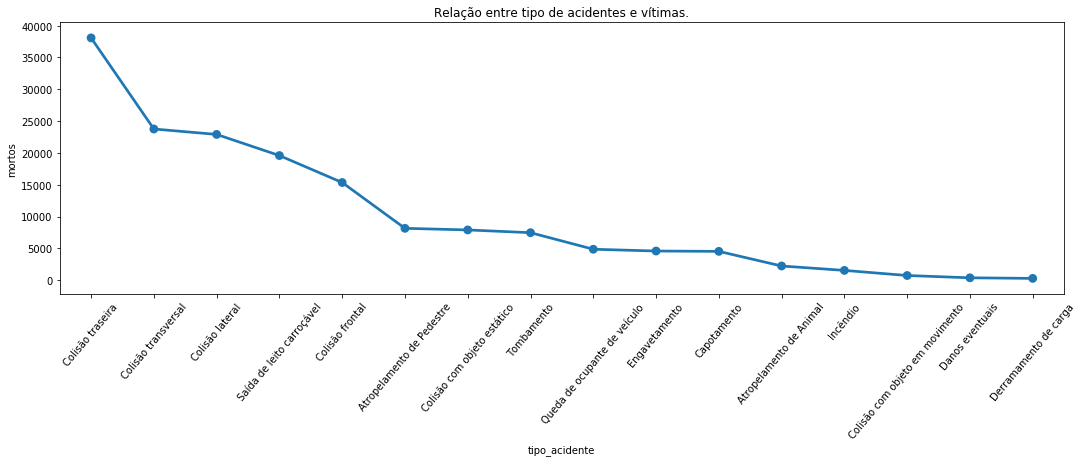

In [146]:
plt.figure(figsize=(18,5))
sns.pointplot(x='tipo_acidente', y='mortos',data=tipo_de_acidente)
plt.xticks(rotation=50)
plt.title('Relação entre tipo de acidentes e vítimas.')
plt.savefig(os.path.join(IMG_PATH,'tipos_acidentes.png'), format='png')
plt.show()

A maior causas dos acidentes são por colisão traseira seguido por colisão transversal, saída de leito carroçável e colisão frontal

In [59]:
#Relação dos acidentes com tipo de pista. 
df.groupby('tipo_veiculo')['tipo_pista'].value_counts().head(20)

tipo_veiculo          tipo_pista
Automóvel             Simples       36219
                      Dupla         28825
                      Múltipla       5606
Bicicleta             Simples        1041
                      Dupla           847
                      Múltipla        198
Bicicleta_motorizada  Simples         263
                      Dupla           171
                      Múltipla         33
Caminhonete           Simples       10799
                      Dupla          6525
                      Múltipla       1064
Caminhão              Simples       14052
                      Dupla          8379
                      Múltipla       1154
Carro de mão          Dupla             4
                      Simples           2
Carroça-charrete      Simples          48
                      Dupla            41
                      Múltipla          7
Name: tipo_pista, dtype: int64

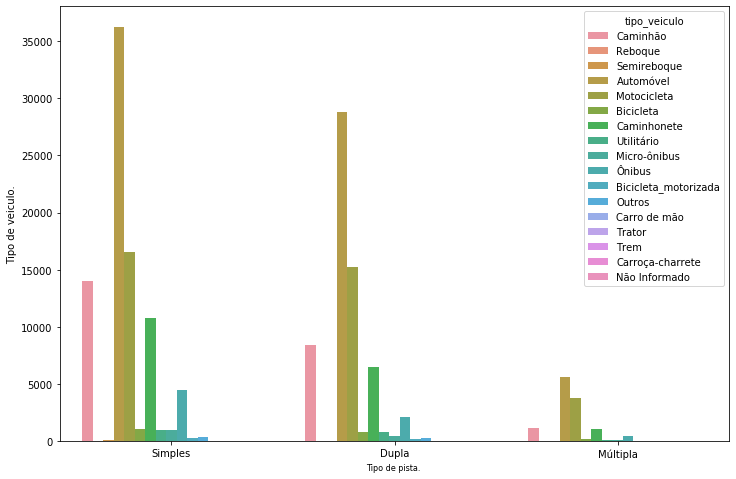

In [60]:
#Relação dos acidentes com tipo de pista. 
plt.figure(figsize=(12,8))
sns.countplot(x='tipo_pista',data=df,hue='tipo_veiculo')
plt.xlabel('Tipo de pista. ',size=8)
plt.ylabel('Tipo de veiculo.')
plt.savefig(os.path.join(IMG_PATH,'tipos_de_veiculos_acidentes.png'), format='png')
plt.show()

As vias múltiplas são mais efecientes para evitar acidentes, se comparado com as vias simples e duplas.

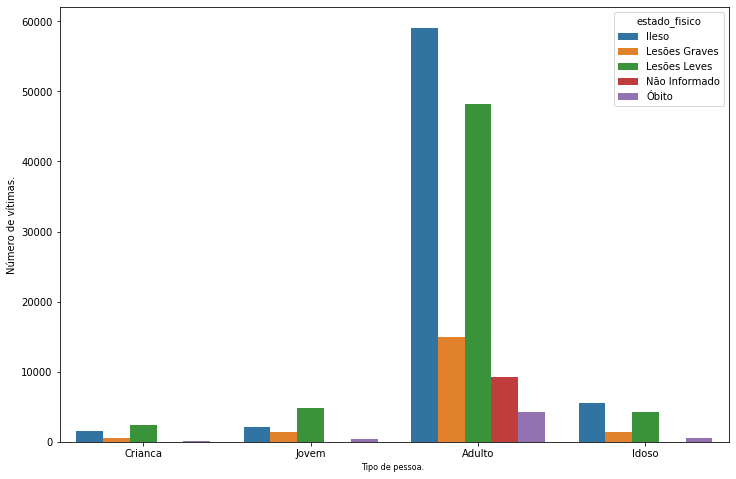

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x='idade',data=df,hue='estado_fisico')
plt.xlabel('Tipo de pessoa. ',size=8)
plt.ylabel('Número de vítimas.')
plt.savefig(os.path.join(IMG_PATH,'faixa_etaria_vitimas.png'), format='png')
plt.show()

A maioria das vítimas são adultos. 

In [62]:
#Criando mapa de calor das br que mais causam acidentes.

# Extraindo as coordenadas de 162273 registros:
coordenadas=[]
for lat,lng in zip(df.latitude.values[:162273],df.longitude.values[:162273]):
    coordenadas.append([lat,lng])

In [63]:
# Renderizando o mapa com algumas personalizações:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=3,tiles='Stamen Terrain')

In [64]:
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [68]:
#Agrupando Data com br e os estados de saúde
df_agrupado = df.groupby(['data_inversa', 'br'])['mortos', 'ilesos', 'feridos_leves', 'feridos_graves'].sum().reset_index()

In [69]:
df_agrupado.sort_values(by='mortos', ascending=False)

data_inversa     br  mortos  ilesos  feridos_leves  feridos_graves
14030   2019-11-01  116.0      10      55             40               9
9184    2019-07-21  101.0      10      33             32              16
16007   2019-12-13  116.0      10      32             18               4
15876   2019-12-10  116.0       8      25             14               6
5198    2019-04-27  101.0       8      31             39               8
...            ...    ...     ...     ...            ...             ...
6298    2019-05-20  110.0       0       4              4               1
6300    2019-05-20  135.0       0       0              1               1
6301    2019-05-20  153.0       0       5              5               2
6302    2019-05-20  155.0       0       0              3               0
16939   2019-12-31  493.0       0       1              2               0

[16940 rows x 6 columns]

In [71]:
#Analisando Br com os tipos de estado físico. 
df_group_br = df.groupby('br')['mortos', 'ilesos', 'feridos_leves', 'feridos_graves'].sum().reset_index()

In [72]:
df_group_br.sort_values(by='mortos', ascending=False)

br  mortos  ilesos  feridos_leves  feridos_graves
12   116.0     669    9905           8524            2051
9    101.0     656   11062           9870            2903
17   153.0     216    2683           2439             762
4     40.0     203    3222           3116             840
58   364.0     188    2449           1979             537
..     ...     ...     ...            ...             ...
98   457.0       0       3              2               0
82   419.0       0       0             11               1
95   447.0       0       6              5               2
85   422.0       0       0              1               0
115  495.0       0      15             19               5

[116 rows x 5 columns]

In [73]:
temp = df.groupby('data_inversa')['ilesos', 'mortos', 'feridos_leves','feridos_graves'].sum().reset_index()

In [74]:
temp = temp.melt(id_vars="data_inversa", value_vars=['ilesos', 'feridos_graves', 'feridos_leves','mortos'],
                 var_name='Caso', value_name='Count')

In [75]:
ilesos = '#ff2e63'
mortos = '#21bf73'
feridos_graves = '#ff2e63'
feridos_leves = '#fe9801'

In [117]:
#Mapa interativo dos casos.
fig = px.area(temp, 
              x="data_inversa", 
              y="Count", 
              color='Caso', 
              height=800,
              title='Acidentes ao longo do ano em 2019.',
              color_discrete_sequence = [feridos_graves, mortos, feridos_leves, ilesos])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [79]:
#Mapa interativo dos Acidentes de 2019 de 1 até 365. 

In [80]:
df['acidente'] = 1

In [81]:
df = df.groupby(['data_inversa','latitude','longitude']).agg({'acidente':'sum'}).reset_index()

In [82]:
base_map = folium.Map(location = [-15, -47],control_scale=True, zoom_start=4.5)

In [83]:
df = df.sort_values(by='data_inversa')

In [84]:
df_date_lat_lon_list = []
for hour in df.data_inversa.sort_values().unique():
    df_date_lat_lon_list.append(df.loc[df.data_inversa == hour, ['latitude', 'longitude', 'acidente']].values.tolist())


In [85]:
#Plotando gráfico. 
mapa1 = HeatMapWithTime(df_date_lat_lon_list, radius=5, gradient={0.1: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

In [281]:
mapa1.save('acidentes_2019.html')